In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import catboost
from catboost import CatBoostClassifier, FeaturesData
from sklearn.model_selection import GroupShuffleSplit
import nltk
import optuna
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from nltk.stem.snowball import RussianStemmer

from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
df = train
column = 'sentence'

In [108]:
custom_stopwords = ['банк', 'очен', 'сотрудник', 'клиент', 'карт', 'вопрос', 'работ','котор','обслуживан','эт','как','получ','обращен', 'заявлен',\
                    'могут', 'отношен', 'друг', 'итог', 'ситуац',
 'отделен', 'мо', 'офис', 'сво', 'хоч','работа','сам','всем','менеджер','специалист','услов','больш','дан','ответ','счет',\
                    'решен','год', 'так','вообщ','деньг','сбербанк','ваш','сказа','услуг','говор','никак','поч','телефон','звон']

In [109]:
topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]

word_count_dict = dict(Counter(topic_words))
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("russian")]

In [110]:
custom_stopwords += popular_words[int(len(popular_words)*0.1):len(popular_words)]


In [111]:
custom_stopwords

['банк',
 'очен',
 'сотрудник',
 'клиент',
 'карт',
 'вопрос',
 'работ',
 'котор',
 'обслуживан',
 'эт',
 'как',
 'получ',
 'обращен',
 'заявлен',
 'могут',
 'отношен',
 'друг',
 'итог',
 'ситуац',
 'отделен',
 'мо',
 'офис',
 'сво',
 'хоч',
 'работа',
 'сам',
 'всем',
 'менеджер',
 'специалист',
 'услов',
 'больш',
 'дан',
 'ответ',
 'счет',
 'решен',
 'год',
 'так',
 'вообщ',
 'деньг',
 'сбербанк',
 'ваш',
 'сказа',
 'услуг',
 'говор',
 'никак',
 'поч',
 'телефон',
 'звон',
 'наша',
 'контроля',
 'связался',
 'сотрудника.',
 'истории',
 'результатов',
 'списание',
 'бесплатная',
 'угрозы',
 'оформляют',
 'наличии',
 'отвратительно',
 'погашение',
 'распечатать',
 'придя',
 'удачи',
 'приветливые,',
 'удобства',
 'навязали',
 'увеличить',
 'лет.',
 'знаем',
 'документы.',
 'простой',
 'девушку',
 'вывод:',
 'непосредственно',
 'комиссий',
 'поступило',
 'выполнении',
 'некомпетентный',
 'понимает',
 'увидел',
 'клиентский',
 'хочу,',
 'анастасии',
 'сказав',
 'собирается',
 'здравству

In [112]:
def wordCloudFunction(df,column,numWords):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("russian")]
    popular_words_nonstop = [w for w in popular_words if w not in custom_stopwords]
    word_string=str(popular_words_nonstop)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=numWords,
                          width=1000,height=1000,
                         ).generate(word_string)
    plt.clf()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()



In [113]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

In [114]:
train = pd.read_csv('sentiments.csv')

In [115]:
train_pos = train.loc[train['sentiment']==0,:]
train_neg = train.loc[train['sentiment']==2,:]

stopword_list = set(stopwords.words('russian'))
MAX_TFIDF_FEATURES = 75
stop_words = stopwords.words('russian')
rs = RussianStemmer()

In [116]:
def preprocess(data, stem = True):
    
    df = data.copy()
    
    df["sentence"] = df["sentence"].str.lower() 
    df["sentence"] = df["sentence"].str.replace('[^\w\s]',' ')
    
    df["sentence"] = df["sentence"].apply(lambda x: " ".join(x for x in x.split() if x not in stopword_list))
    if (stem):
        df["sentence"] =df["sentence"][0:len(df)].apply(lambda x: " ".join([rs.stem(word) for word in x.split()]))
    else:
        df["sentence"] = lemma_stem_text(df["sentence"])

    return df



In [117]:
train_pos = preprocess(train_pos)
train_neg = preprocess(train_neg)

/var/folders/t6/9f9frnss6fn9xmc7m_w9qqtw0000gn/T/ipykernel_53093/2314253178.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["sentence"] = df["sentence"].str.replace('[^\w\s]',' ')


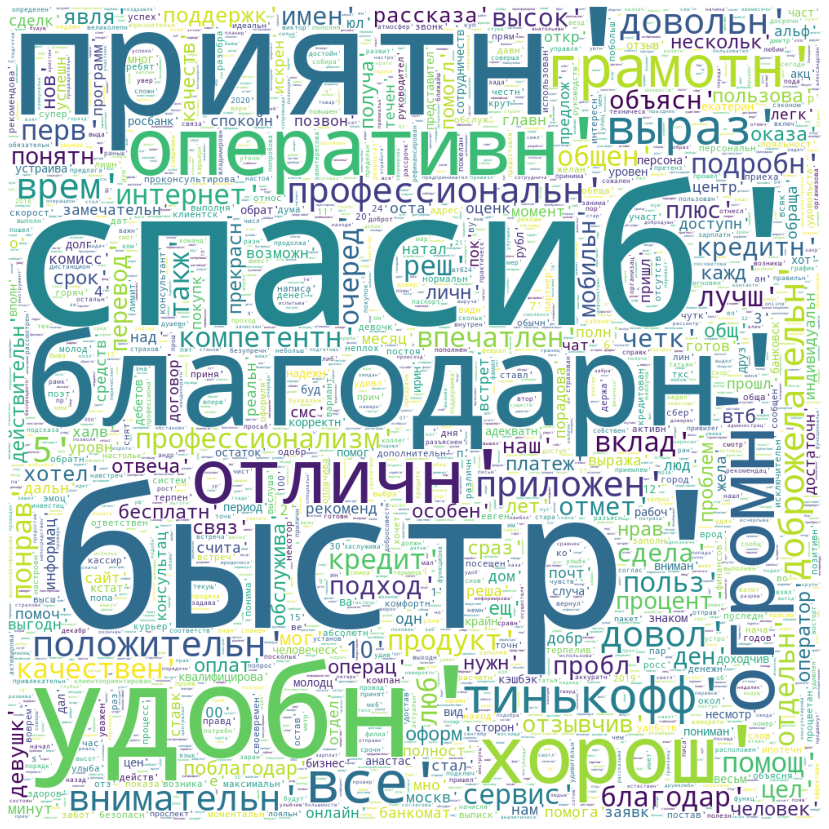

In [118]:
plt.figure(figsize=(15,15))
wordCloudFunction(train_pos,'sentence',100000)


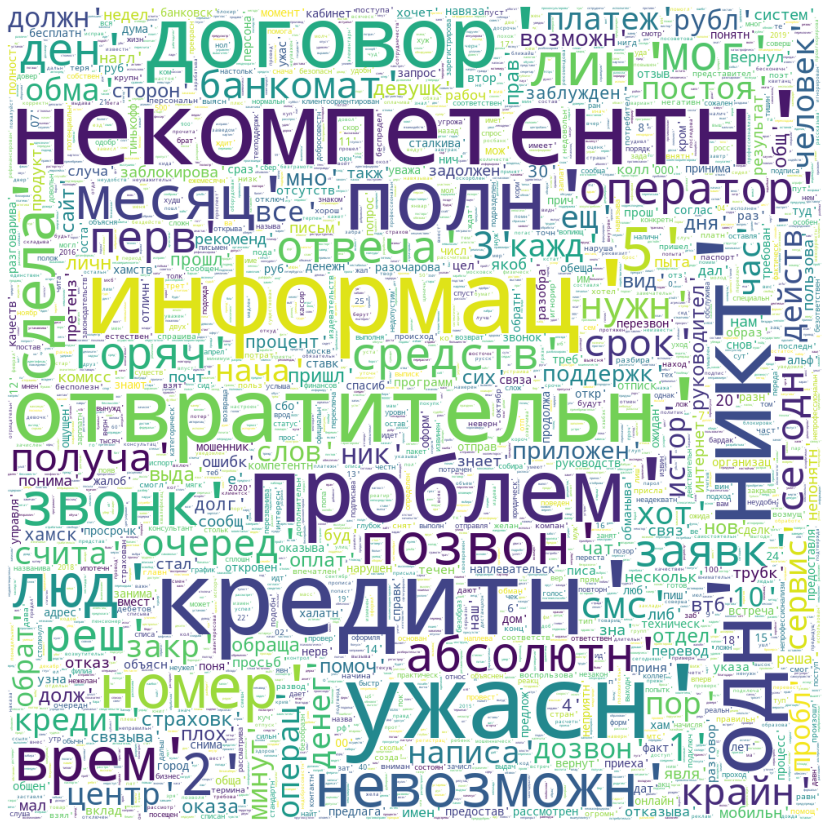

In [119]:
plt.figure(figsize=(15,15))
wordCloudFunction(train_neg,'sentence',100000)